# Assigment - 2 - Web Scrapping
By Mónica Atiaga

Batch - DSNB1222

1. All the questions must be done in a single Jupyternotebook.
2. There should be proper comments in code.

In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

import time
import regex as re
import math
import random

In [133]:
#!pip install webdriver-manager

**Q1:** Write a python program to scrape data for “Data Analyst” Job position in “Bangalore” location. 

You have to scrape the 
* job-title, 
* job-location, 
* company_name, 
* experience_required. 

You have to scrape first 10 jobs data.
This task will be done in following steps:

1. First get the webpage https://www.naukri.com/
2. Enter “Data Analyst” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the 
location” field.
3. Then click the searchbutton.
4. Then scrape the data for the first 10 jobs results youget.
5. Finally create a dataframe of the scraped data.
**Note: All of the above steps have to be done in code. No step is to be done manuall**

In [2]:
def load_items_by_xpath(driver, n=None, **kwargs):
    ''' Load items on the page with the attributes sent in kwargs.
        n: number of products required
        kwargs: dictionary with key, value = label, XPATH to retrieve 
        Return: a DataFrame with the info of the products
    '''
    data_retrieved = {}
    lenght_ref = -1
    
    for key, xpath in kwargs.items():
        # scraping Brands using list comprehension
        tags = driver.find_elements(By.XPATH, xpath )
        items = [ tag.text for tag in tags]
        
        if(lenght_ref <0):
            lenght_ref = len(items)
        
        if(lenght_ref == len(items)):
            data_retrieved[key] = items
            print(f"{key} retrieved and included:", len(items))
        else:
            data_retrieved[key] = [None for _ in range(lenght_ref)]
            print(f"{key} retrieved NOT COMPATIBLE:", len(items))

    df = pd.DataFrame(data_retrieved)
        
    if ( bool(n) and (n < len(df))):
        return (df.iloc[0:n,:])
    
    return df


def load_data_by_group(driver, xpath_grp, length_ref, by=By.CLASS_NAME, **kwargs):
        '''Retrieves the data by group, in case any attribute is not 
           defined it returns None for that specific item.  
           xpath_grp = XPATH to retrieve the group
           n = records to recover
           kwargs = attributes to find in each group, with corresponding CLASS_NAME
           
           Return: a data frame with the data recovered'''
        data_retrieved = {}
        # Scraping the group of elements
        tags = driver.find_elements(By.XPATH, xpath_grp)

        # Scraping all the atributes in each group
        for tag_name, xpath in kwargs.items():
            items = []
                
            for tag in tags:
                try:
                    items.append(tag.find_element(by, kwargs[tag_name]).text) # .get_attribute("innerHTML")
                except NoSuchElementException:
                    items.append(None) # if "tag_name" not found then None

            if ( not(length_ref) or length_ref == len(items)):
                data_retrieved[tag_name] = items
                print(f"{tag_name} retrieved: {len(items)}" )

        df = pd.DataFrame(data_retrieved)
        return df

In [121]:
driver = webdriver.Chrome()
driver.get("http://www.naukri.com/")

wait_time=3
time.sleep(wait_time)

designation = driver.find_element(By.CLASS_NAME, "suggestor-input")
designation.send_keys('Data Analyst')

location = driver.find_element(By.XPATH, "/html/body/div/div[7]/div/div/div[5]/div/div/div/div[1]/div/input")
location.send_keys('Bangalore')

time.sleep(wait_time)

search = driver.find_element(By.CLASS_NAME,"qsbSubmit")
search.click()

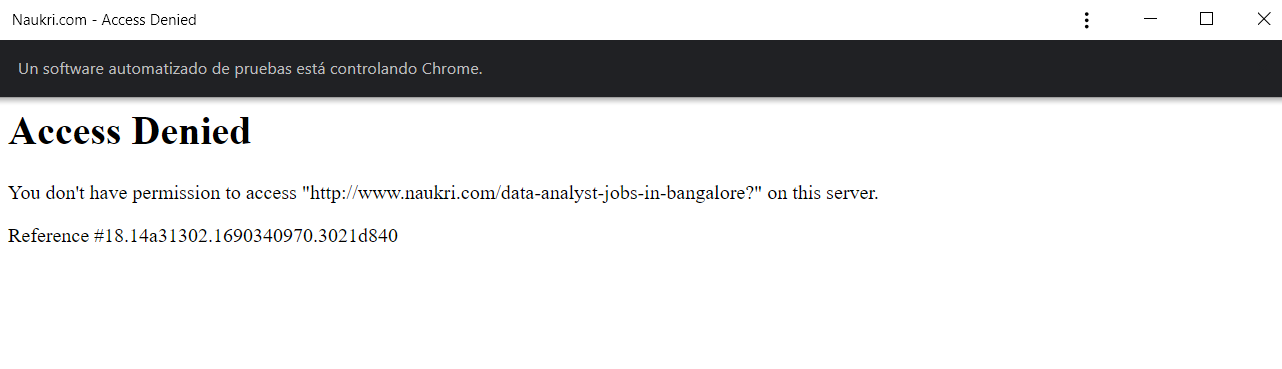

In [126]:
# I had to find another way to scape the data
driver = webdriver.Chrome()
driver.get("http://www.naukri.com/data-analyst-jobs-in-bangalore?")

In [104]:
btn = driver.find_element(By.XPATH, '//button[contains(text(), "Got it")]')
btn.get_attribute('innerHTML')
btn.click()

wait_time=5
time.sleep(wait_time)

In [124]:
attr_xpath = {'job-title': '//a[@class="title ellipsis"]',
        'job-location': '//span[@class="ellipsis fleft locWdth"]',
        'company_name': '//a[@class="subTitle ellipsis fleft"]',
        'experience_required': '//span[@class="ellipsis fleft expwdth"]'}

df = load_items_by_xpath(driver, n=10, **attr_xpath)

# Cleaning driver
driver.quit()

# saving the dataframe
if(len(df)>0):
    df.to_csv('webScraping2_datasets/q1_jobs_naukri.csv')

display(df)

job-title retrieved and included: 20
job-location retrieved and included: 20
company_name retrieved and included: 20
experience_required retrieved and included: 20


,job-title,job-location,company_name,experience_required
0,Data Analyst,Bangalore/Bengaluru,Eastvantage,4-6 Yrs
1,Data Analyst,"Bangalore/ Bengaluru, Karnataka, Gurgaon/ Guru...",Delhivery,1-3 Yrs
2,Data Analyst,Bangalore/Bengaluru,Everest Vacuum,2-5 Yrs
3,Data Analyst,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Boomi Software,1-5 Yrs
4,Data Analyst,"Bangalore/Bengaluru, Hyderabad/Secunderabad, Pune",Synechron,5-8 Yrs
5,Data Analyst,"Bangalore/Bengaluru, Hyderabad/Secunderabad, Pune",Synchron Infotech,5-8 Yrs
6,Data Analyst I,Bangalore/Bengaluru,Cerner,5-10 Yrs
7,Data Analyst,Bangalore/Bengaluru,Persolkelly India,0-2 Yrs
8,Data Analyst,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Truthfools,3-8 Yrs
9,Data Analyst | HyVee,Bangalore/Bengaluru,Talent500,3-5 Yrs


**Q2:** Write a python program to scrape data for “Data Scientist” Job position in “Bangalore” location. You 
have to scrape the job-title, job-location, company_name. You have to scrape first 10 jobs data.
This task will be done in following steps:
1. First get the webpage https://www.naukri.com/
2. Enter “Data Scientist” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the location” field.
3. Then click the search button.
4. Then scrape the data for the first 10 jobs results you get.
5. Finally create a dataframe of the scraped data.
**Note: All of the above steps have to be done in code. No step is to be done manually**

In [128]:
driver = webdriver.Chrome()
driver.get("http://www.naukri.com/")

wait_time=3
time.sleep(wait_time)

designation = driver.find_element(By.CLASS_NAME, "suggestor-input")
designation.send_keys('Data Scientist')

location = driver.find_element(By.XPATH, "/html/body/div/div[7]/div/div/div[5]/div/div/div/div[1]/div/input")
location.send_keys('Bangalore')

time.sleep(wait_time)

search = driver.find_element(By.CLASS_NAME,"qsbSubmit")
search.click()

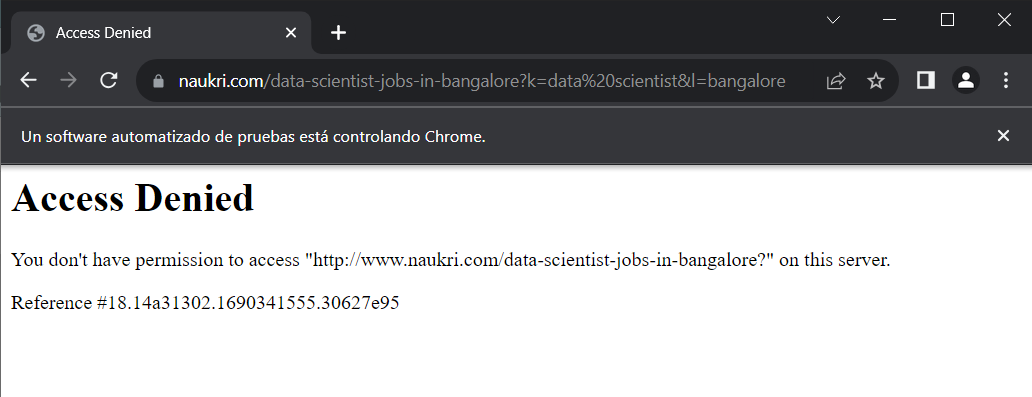

In [132]:
# I had to find another way to scape the data
url = "http://www.naukri.com/data-scientist-jobs-in-bangalore?"
driver = webdriver.Chrome()
driver.get(url)

In [134]:
attr_xpath = {'job-title': '//a[@class="title ellipsis"]',
        'job-location': '//span[@class="ellipsis fleft locWdth"]',
        'company_name': '//a[@class="subTitle ellipsis fleft"]',
        'experience_required': '//span[@class="ellipsis fleft expwdth"]'}

df = load_items_by_xpath(driver, n=10, **attr_xpath)

# Cleaning driver
driver.quit()

# saving the dataframe
if(len(df)>0):
    df.to_csv('webScraping2_datasets/q2_jobs_datascientist.csv')

display(df)

job-title retrieved and included: 20
job-location retrieved and included: 20
company_name retrieved and included: 20
experience_required retrieved and included: 20


,job-title,job-location,company_name,experience_required
0,Analystics & Modeling Specialist,"Bangalore/Bengaluru, Kolkata, Mumbai, Hyderaba...",Accenture,6-8 Yrs
1,Data Science Specialist,"Bangalore/Bengaluru, Kolkata, Mumbai, Hyderaba...",Accenture,2-4 Yrs
2,Data Scientist,"Bangalore/Bengaluru, Mumbai (All Areas)",PwC,3-6 Yrs
3,Data Scientist,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Tredence,2-4 Yrs
4,Data Scientist,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",IBS Software Services,5-8 Yrs
5,ACN - Applied Intelligence - Finance - Data Sc...,"Bangalore/Bengaluru, Hyderabad/Secunderabad, P...",Accenture,2-7 Yrs
6,Senior Data Scientist,"Bangalore/Bengaluru, Mumbai",Fractal Analytics,5-10 Yrs
7,Data Scientist,"Hybrid - Bangalore/ Bengaluru, Karnataka, Noid...",HCLTech,7-12 Yrs
8,Data Scientist with Retail Domain,"Bangalore/Bengaluru, Kolkata, Mumbai, Nagpur, ...",TRH Consultancy Services,4-9 Yrs
9,Data Scientist,"Bangalore/Bengaluru, Noida, Kolkata, Mumbai, H...",TRH Consultancy Services,5-10 Yrs


In [129]:
driver.quit()

**Q3:** In this question you have to scrape data using the filters available on the webpage as shown below

You have to use the location and salary filter.

You have to scrape data for “Data Scientist” designation for first 10 job results.

You have to scrape the job-title, job-location, company name, experience required. 

The location filter to be used is “Delhi/NCR”. The salary filter to be used is “3-6” lakhs

The task will be done as shown in the below steps:

1. first get the webpage https://www.naukri.com/
2. Enter “Data Scientist” in “Skill, Designations, and Companies” field.
3. Then click the search button.
4. Then apply the location filter and salary filter by checking the respective boxes
5. Then scrape the data for the first 10 jobs results you get.
6. Finally create a dataframe of the scraped data.
**Note: All of the above steps have to be done in code. No step is to be done manually.**

In [135]:
driver = webdriver.Chrome()
driver.get("http://www.naukri.com/")

wait_time=3
time.sleep(wait_time)

designation = driver.find_element(By.CLASS_NAME, "suggestor-input")
designation.send_keys('Data Scientist')

time.sleep(wait_time)

search = driver.find_element(By.CLASS_NAME,"qsbSubmit")
search.click()

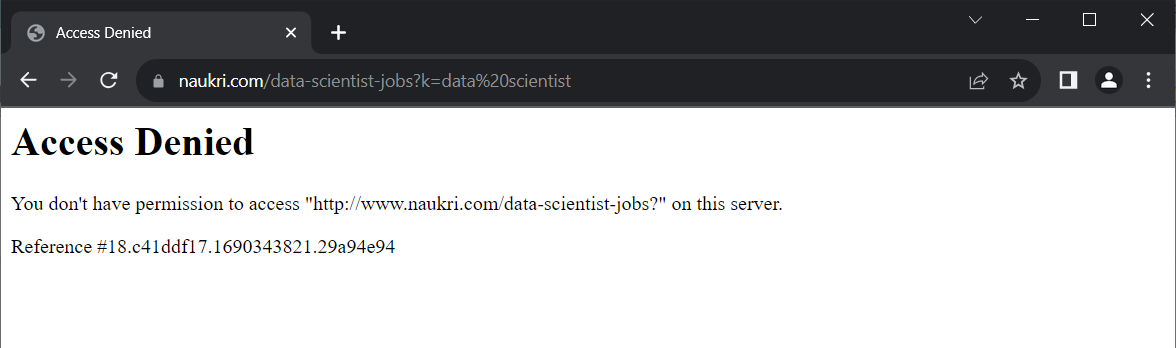

In [150]:
driver.quit()

**Q4:** Scrape data of first 100 sunglasses listings on flipkart.com. You have to scrape four attributes:
1. Brand
2. Product Description
3. Price

The attributes which you have to scrape is ticked marked in the below image

To scrape the data you have to go through following steps:
1. Go to Flipkart webpage by url :https://www.flipkart.com/
2. Enter “sunglasses” in the search field where “search for products, brands and more” is written and click the search icon
3. After that you will reach to the page having a lot of sunglasses. From this page you can scrap the required data as usual.
4. After scraping data from the first page, go to the “Next” Button at the bottom other page , then click on it.
5. Now scrap data from this page as usual
6. Repeat this until you get data for 100 sunglasses.
**Note: That all of the above steps have to be done by coding only and not manually.**


In [67]:
def load_products_by_page(driver, n=None, **kwargs):
    ''' Load the products with brand, description and price on the page.
        n: number of products required
        Return: a DataFrame with the info of the products
    '''
    # scraping each attribute except "% off"
    if 'ATTR' in kwargs:
        attributes = kwargs['ATTR']
    else:
        attributes = kwargs
    
    df = load_items_by_xpath(driver, None, **attributes) 
    length_ref = df.shape[0]
    
    if 'GROUP' in kwargs:
        xpath_grp = kwargs['GROUP']['XPATH_GRP']
        attributes_gr =  kwargs['GROUP']['ATTR_GRP']
        df2 = load_data_by_group(driver, xpath_grp, length_ref, By.CLASS_NAME,**attributes_gr)
        df = pd.concat([df,df2], axis=1)

    if (bool(n) and length_ref > n):
        return df[:n] 

    return df

def go_next_page(driver, xpath):
    ''' Go to the next page'''
        
    next_btn = driver.find_element(By.XPATH, xpath)
    print(f" Going to {next_btn.text}")
    
    # scroll until button be visible
    actions = ActionChains(driver)
    actions.move_to_element(next_btn).perform()

    # Wait until the button be visible (loading compleated)
    wait = WebDriverWait(driver, 15)
    wait.until(EC.element_to_be_clickable((By.XPATH, xpath)))

    # Click the button once it is clickable
    next_btn.click()

def go_next_page2(driver, i):
    ''' Go to the next page of products'''
    if (i == 0):
        next_pos = 11
    else:
        next_pos = 12
    
    xpath = f'//nav[@class="yFHi8N"]/a[{next_pos}]'
    go_next_page(driver, xpath)
        

def wait_random(driver):
    '''Simulate random number of timeouts'''
    time_to_wait = random.choice([60, 15, 30, 45])
    print(f"Waiting..{time_to_wait} seconds.")
    WebDriverWait(driver, time_to_wait)   # Esperar hasta n segundos
    
def retrieve_product_per_page(driver, xpath):
    # Retrieve the total number of products from the search and 
    # the number of products on the retrieved page
    reg = driver.find_element(By.XPATH, xpath)

    pattern = r'\b\d{1,3}(?:,\d{3})*\b|\b\d+\b'
    matches = re.findall(pattern, reg.text)
    numbers_without_commas = [match.replace(',', '') for match in matches]
    nreg = [*map(int, numbers_without_commas)]
    
    return nreg

In [69]:
def cleaning_products(df):
    # Cleaning the data
    pattern = r'(\d+%)'
    df['% off'] = df['% off'].str.extract(pattern)
    return (df)
    
def remove_popup():
    # Check if an element on the new page is present
    try:
        close_button  = driver.find_element(By.XPATH, '//button[@class="_2KpZ6l _2doB4z"]')
        close_button.click() 
        print("Pop-up removed")
    except NoSuchElementException:
        print("No pop-up windows was found")

def retrieve_products(n):
    ''' Retrieve the products advancing page by page until completing all "n" products.
        Return: a dataframe with the products'''
    # Checking the found records
    total_records_to_retrieve = n

    try:
        first, second, total = retrieve_product_per_page(driver, '//span[@class="_10Ermr"]')
        if(total < total_records_to_retrieve):
            total_records_to_retrieve = total
    except NoSuchElementException:
        print("Total records not found!")
    
    dict_config = { 'ATTR': {'Brand': '//div[@class="_2WkVRV"]',
                           'Product description': '//a[@class="IRpwTa" or @class="IRpwTa _2-ICcC"]',
                           'Price': '//div[@class="_30jeq3"]'},
                   'GROUP': {'XPATH_GRP':'//div[@class="_2B099V"]', 'ATTR_GRP': {'% off': '_3Ay6Sb'} }}
    
    df_products = pd.DataFrame()
    i = 0 

    while( total_records_to_retrieve > 0 ):

        print('*'*40, 'i=' ,i)

        wait_time = 5
        time.sleep(wait_time)

        df = load_products_by_page(driver, total_records_to_retrieve, **dict_config) 
        df_products = pd.concat([df_products,df])

        total_records_to_retrieve -= len(df)

        print("total_records_to_retrieve left", total_records_to_retrieve)
        print("retrieved records:", len(df_products))

        if (total_records_to_retrieve > 0):
            wait_random(driver)
            go_next_page2(driver, i)          

        i += 1

    print( f'Products retrieved successfully: {len(df_products)}' )
    
    # Reseting index
    df_products.reset_index(drop=True, inplace=True)
    
    return (df_products)
        
        
def search_product(product):
    try:
        input = driver.find_element(By.XPATH, '//input[@class="Pke_EE" or @class="_3704LK"]') 
        input.send_keys(product)
        print(f"Search for {product}")

        WebDriverWait(driver, 10)

        btn = driver.find_element(By.XPATH, '//button[@class="_2iLD__" or @class="L0Z3Pu"]') 
        btn.click()
        print("Click successful")

    except NoSuchElementException:
        print("An element wasn't found.")
        

In [70]:
driver = webdriver.Chrome()

url = "https://www.flipkart.com/"
driver.get(url)

# Closing pop-up window
wait_time = 3
time.sleep(wait_time)

remove_popup()

# Search for product
time.sleep(wait_time)

product = 'sunglasses'
search_product(product)

# Web scraping the products
time.sleep(5)
df_products = retrieve_products(100)

# Checking the size of dataframe
print(f"Shape: {df_products.shape}")

# Cleaning driver
driver.quit()

df_products = cleaning_products(df_products)    
display(df_products)

# Saving the result dataset
df_products.to_csv('webScraping2_datasets/q4_products.csv')

Pop-up removed
Search for sunglasses
Click successful
**************************************** i= 0
Brand retrieved and included: 40
Product description retrieved and included: 40
Price retrieved and included: 40
% off _3Ay6Sb _3Ay6Sb class name
% off retrieved: 40
total_records_to_retrieve left 60
retrieved records: 40
Waiting..45 seconds.
 Going to NEXT
**************************************** i= 1
Brand retrieved and included: 40
Product description retrieved and included: 40
Price retrieved and included: 40
% off _3Ay6Sb _3Ay6Sb class name
% off retrieved: 40
total_records_to_retrieve left 20
retrieved records: 80
Waiting..60 seconds.
 Going to NEXT
**************************************** i= 2
Brand retrieved and included: 40
Product description retrieved and included: 40
Price retrieved and included: 40
% off _3Ay6Sb _3Ay6Sb class name
% off retrieved: 40
total_records_to_retrieve left 0
retrieved records: 100
Products retrieved successfully: 100
Shape: (100, 4)


,Brand,Product description,Price,% off
0,hayden haiza,UV Protection Cat-eye Sunglasses (48),₹239,76%
1,hayden haiza,"Polarized, UV Protection Aviator Sunglasses (55)",₹391,84%
2,SRPM,UV Protection Wayfarer Sunglasses (50),₹194,85%
3,Elligator,"UV Protection Cat-eye, Retro Square, Oval, Rou...",₹168,71%
4,iCopertina,UV Protection Retro Square Sunglasses (Free Size),₹199,80%
...,...,...,...,...
95,PIRASO,UV Protection Wayfarer Sunglasses (52),₹296,88%
96,DEIXELS,UV Protection Wayfarer Sunglasses (Free Size),₹349,56%
97,VINCENT CHASE,"Polarized, UV Protection Rectangular Sunglasse...",₹854,57%
98,Ray-Ban,UV Protection Round Sunglasses (44),"₹3,073",30%


**Q5:** Scrape 100 reviews data from flipkart.com for iphone11 phone. 

You have to go the link: 

https://www.flipkart.com/apple-iphone-11-black-64-gb/product-reviews/itm4e5041ba101fd?pid=MOBFWQ6BXGJCEYNY&lid=LSTMOBFWQ6BXGJCEYNYZXSHRJ&marketplace=FLIPKART

As shown in the above page you have to scrape the tick marked attributes. These are:
1. Rating
2. Review summary
3. Full review
4. You have to scrape this data for first 100 reviews.
**Note: All the steps required during scraping should be done through code only and not manually.**

#### Functions:

In [12]:
def retrieve_reviews(n, dict):
    ''' Retrieve the reviews advancing page by page until completing all "n" products.
        dict : Dictionary with the attributes and xpaths
        
        Return: a dataframe'''
    # Checking the number of records
    first, total = retrieve_product_per_page(driver, '//div[@class="_2MImiq _1Qnn1K"]/span')
    total_records_to_retrieve = n
    
    # Setting the records to retrieve
    if(total < total_records_to_retrieve):
        total_records_to_retrieve = total
        
    df_all = pd.DataFrame()
    i = 0 

    while( total_records_to_retrieve > 0 ):

        print('*'*40, 'i=' ,i)
        
        # Waiting for the page to load
        wait_time = 10
        time.sleep(wait_time)

        df = load_items_by_xpath(driver, total_records_to_retrieve, **dict) 
        df_all = pd.concat([df_all,df])

        total_records_to_retrieve -= len(df)

        print("total_records_to_retrieve left", total_records_to_retrieve)
        print("retrieved records:", len(df_all))

        if (total_records_to_retrieve > 0):
            time.sleep(3)
            xpath = '//a[@class="_1LKTO3"][2]'
            if (i == 0):
                xpath = '//a[@class="_1LKTO3"][1]'
                
            go_next_page(driver, xpath)

        i+= 1

    print( f'Records retrieved successfully: {len(df_all)}' )
    
    # Reseting index
    df_all.reset_index(drop=True, inplace=True)
    return (df_all)

#### Web scraping - start

In [11]:
driver = webdriver.Chrome()

url = "https://www.flipkart.com/apple-iphone-11-black-64-gb/product-reviews/itm4e5041ba101fd?pid=MOBFWQ6BXGJCEYNY&lid=LSTMOBFWQ6BXGJCEYNYZXSHRJ&marketplace=FLIPKART"
driver.get(url)

# Waiting for info to load
wait_time = 5
time.sleep(wait_time)

first, total = retrieve_product_per_page(driver, '//div[@class="_2MImiq _1Qnn1K"]/span')
print(f'Total reviews: {total}')

dict = {
    'Rating': '//div[@class="_3LWZlK _1BLPMq"]',
    'Review sumary': '//p[@class="_2-N8zT"]',
    'Full review': '//div[@class="t-ZTKy"]/div/div'}

df_reviews = retrieve_reviews(100, dict)

# Cleaning
driver.quit()

display(df_reviews)

# Saving the result dataset
df_reviews.to_csv('webScraping2_datasets/q5_reviews.csv')

Total reviews: 1133
**************************************** i= 0
Rating retrieved and included: 10
Review sumary retrieved and included: 10
Full review retrieved and included: 10
total_records_to_retrieve left 90
retrieved records: 10
 Going to NEXT
**************************************** i= 1
Rating retrieved and included: 10
Review sumary retrieved and included: 10
Full review retrieved and included: 10
total_records_to_retrieve left 80
retrieved records: 20
 Going to NEXT
**************************************** i= 2
Rating retrieved and included: 10
Review sumary retrieved and included: 10
Full review retrieved and included: 10
total_records_to_retrieve left 70
retrieved records: 30
 Going to NEXT
**************************************** i= 3
Rating retrieved and included: 10
Review sumary retrieved and included: 10
Full review retrieved and included: 10
total_records_to_retrieve left 60
retrieved records: 40
 Going to NEXT
**************************************** i= 4
Rating ret

,Rating,Review sumary,Full review
0,5,Mind-blowing purchase,Photos super
1,5,Classy product,Camera is awesome\nBest battery backup\nA perf...
2,5,Terrific,Very very good
3,5,Wonderful,This is amazing at all
4,5,Must buy!,It’s really awesome
...,...,...,...
95,5,Great product,"Awesome phone, great display(may not be a OLED..."
96,5,Great product,Superb Phone..
97,5,Wonderful,Quality camera
98,5,Just wow!,Loved it!!


**Q6:** Scrape data forfirst 100 sneakers you find when you visit flipkart.com and search for “sneakers” in the 
search field.

You have to scrape 3 attributes of each sneaker:
1. Brand
2. ProductDescription
3. Price

As shown in the below image, you have to scrape the above attributes.

#### web scraping start

In [15]:
driver = webdriver.Chrome()

url = "https://www.flipkart.com/"
driver.get(url)

# Closing pop-up window
wait_time = 3
time.sleep(wait_time)

remove_popup()

# Search for product
time.sleep(wait_time)

product = 'sneakers'
search_product(product)

# Web scraping the products
time.sleep(5)
df_products = retrieve_products(100)

# Checking the size of dataframe
print(f"Shape: {df_products.shape}")

# Cleaning driver
driver.quit()

df_products = cleaning_products(df_products)    
display(df_products)

# Saving the result dataset
df_products.to_csv('webScraping2_datasets/q6_sneakers.csv')

No pop-up windows was found
Search for sneakers
Click successful
**************************************** i= 0
Brand retrieved and included: 40
Product description retrieved and included: 40
Price retrieved and included: 40
% off retrieved: 40
total_records_to_retrieve left 60
retrieved records: 40
Waiting..15 seconds.
 Going to NEXT
**************************************** i= 1
Brand retrieved and included: 40
Product description retrieved and included: 40
Price retrieved and included: 40
% off retrieved: 40
total_records_to_retrieve left 20
retrieved records: 80
Waiting..30 seconds.
 Going to NEXT
**************************************** i= 2
Brand retrieved and included: 40
Product description retrieved and included: 40
Price retrieved and included: 40
% off retrieved: 40
total_records_to_retrieve left 0
retrieved records: 100
Products retrieved successfully: 100
Shape: (100, 4)


,Brand,Product description,Price,% off
0,K- FOOTLANCE,Casual Sneakers White Outdoor Shoes For Boys A...,₹549,45%
1,K- FOOTLANCE,Sneakers For Men,₹489,51%
2,Magnolia,Modern Trendy Sneakers boot Sneakers Sneakers ...,₹499,61%
3,BRUTON,Modern Trendy Shoes Sneakers For Men,₹299,76%
4,Sparx,SM-747 Sneakers For Men,₹854,10%
...,...,...,...,...
95,Super Stap,WHITE AIR FORCE SNEAKERS 530 Sneakers For Men,₹610,38%
96,WOODLAND,Sneakers For Men,"₹2,656",30%
97,WROGN,Sneakers For Men,"₹1,049",50%
98,RED TAPE,Sneakers For Men,"₹1,559",70%


**Q7:** Go to webpage https://www.amazon.in/ Enter “Laptop” in the search field and then click the search icon. Then 
set CPU Type filter to “Intel Core i7” as shown in the below image:

After setting the filters scrape first 10 laptops data. You have to scrape 3 attributes for each laptop:
1. Title
2. Ratings
3. Price

#### web scraping start

In [109]:
driver = webdriver.Chrome()

url = "https://www.amazon.in/"
driver.get(url) 

wait_time = 3
time.sleep(wait_time)

# Searching for Laptop 
product = 'Laptop'
input = driver.find_element(By.XPATH, '//input[@id="twotabsearchtextbox"]') 
input.send_keys(product)

wait = WebDriverWait(driver, 10)

btn = driver.find_element(By.XPATH, '//input[@id="nav-search-submit-button"]') 
btn.click()

time.sleep(wait_time)
# Check the option "Intel Core i7"
checkbox = driver.find_element(By.XPATH, '//li[@aria-label="Intel Core i7"]/span/a')

if checkbox.is_enabled():
    checkbox.click()   
else:
    print("Checkbox is disable")
    
attributes = {
    'Title': '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]',
#     'Title': '//span[@class="a-size-medium a-color-base a-text-normal"]',
    'Rating': "a-icon-alt", #By.CLASS_NAME
    'Price': '//span[@class="a-price"]//span[@class="a-offscreen"]',
    'container': '//div[@class="a-section a-spacing-small a-spacing-top-small"]'
}

time.sleep(wait_time)
# Retrieving the titles
title_tags = driver.find_elements(By.XPATH, attributes['Title'])
titles = [el.text for el in title_tags]
print(len(titles))

# Retrieving the prices
price_tags = driver.find_elements(By.XPATH, attributes['Price'])
prices = [el.get_attribute("innerHTML") for el in price_tags][0:len(titles)]
print(len(prices))

# Some laptops have rating and others have not, hence each container with the data of the product was retrieved
container_tags = driver.find_elements(By.XPATH, attributes['container'])
print(len(container_tags))
ratings = []

for tag in container_tags[1:]:
    try:
        item = tag.find_element(By.CLASS_NAME, attributes['Rating'])
        ratings.append(item.get_attribute("innerHTML"))
    except NoSuchElementException:
        ratings.append(None)
    
print(len(ratings))

total_laptops = 10

laptops_df = pd.DataFrame({'Title': titles[:total_laptops],
                           'Rating': ratings[:total_laptops],
                           'Price': prices[:total_laptops]
                          })

# cleaning driver
driver.quit()

laptops_df.to_csv('webScraping2_datasets/q7_laptops.csv')
laptops_df

32
32
25
24


,Title,Rating,Price
0,"Dell Inspiron 5430 13th Gen Laptop, Intel i7-1...",3.5 out of 5 stars,"₹86,420"
1,"Lenovo ThinkPad E14 Intel Core i7 12th Gen 14""...",3.6 out of 5 stars,"₹93,990"
2,"ASUS ROG Zephyrus G16, 16-inch (40.64 cms) FHD...",5.0 out of 5 stars,"₹1,44,990"
3,"HP Pavilion 14, 11Th Gen Intel Core I7-16Gb Ra...",3.6 out of 5 stars,"₹79,990"
4,Acer Aspire 5 Gaming Laptop Intel Core i7 13th...,None,"₹80,990"
5,Lenovo [SmartChoice] IdeaPad Slim 3 Intel Core...,2.4 out of 5 stars,"₹62,990"
6,Acer Nitro 5 AN515-58 Gaming Laptop 12th Gen I...,4.2 out of 5 stars,"₹1,04,990"
7,"Dell Vostro 5630 13th Gen Laptop,Intel i7-1355...",5.0 out of 5 stars,"₹89,990"
8,Lenovo IdeaPad Slim 5 Intel Core i7 12th Gen 1...,4.4 out of 5 stars,"₹80,990"
9,"Dell Inspiron 5630 13th Gen Laptop, Intel Core...",3.6 out of 5 stars,"₹89,880"


**Q8:** Write a python program to scrape data for Top 1000 Quotes of All Time.
The above task will be done in following steps:
1. First get the webpage https://www.azquotes.com/
2. Click on TopQuotes
3. Than scrap a) Quote b) Author c) Type Of Quotes


In [16]:
def text_el(webelement):
    return webelement.text

def get_topics_el(webelement):
    return ([link.text for link in webelement.find_elements(By.TAG_NAME, 'a')])

def load_quotes_by_page(driver, n=None, **kwargs):
    ''' Load items on the page with the attributes sended in kwargs.
        n: number of products required
        kwargs: dictionary with key, value = label, XPATH to retrieve 
        Return: a DataFrame with the info of the products
    '''
    block_tags = driver.find_elements(By.XPATH, '//div[@class="wrap-block"]')

    data_retrieved = {}

    for key, value in attribute.items():

        items = [b.find_element(By.CLASS_NAME, value[0]) for b in block_tags]
        items = [value[1](i) for i in items]
        data_retrieved[key] = items
        
        print( f"{key}: {len(items)}")

    df = pd.DataFrame(data_retrieved)

    if (n < len(df)):
        return (df.iloc[0:n,:])

    return df


def retrieve_quotes(n, dict):
    ''' Retrieve the quotes advancing page by page until completing all "n" products.
        dict : Dictionary with the attributes and xpaths
        
        Return: a dataframe'''
    total_records_to_retrieve = n
    
    df_all = pd.DataFrame()
    i = 0 

    while( total_records_to_retrieve > 0 ):

        print('*'*40, 'i=' ,i)
        
        # Loading data page by page
        df = load_quotes_by_page(driver, total_records_to_retrieve, **dict )
        df_all = pd.concat([df_all,df])

        total_records_to_retrieve -= len(df)

        print("total_records_to_retrieve left", total_records_to_retrieve)
        print("retrieved records:", len(df_all))

        if (total_records_to_retrieve > 0):
            go_next_page(driver, '//li[@class="next"]//a')
            wait_time = 5
            time.sleep(wait_time)

        i += 1

    print( f'Records retrieved successfully: {len(df_all)}' )
    
    # Reseting index
    df_all.reset_index(drop=True, inplace=True)
    return (df_all)

#### web scraping start

In [111]:
driver = webdriver.Chrome()

url = "https://www.azquotes.com/"
driver.get(url) 

wait_time = 3
time.sleep(wait_time)

try:
    link_tq = driver.find_element(By.XPATH, '//a[starts-with(@href,"/top_quotes")]')
    link_tq.click()
    print("Top Quotes clicked")
except NoSuchElementException:
    print("Top Quotes link wasn't find")
    
time.sleep(wait_time)

# Retrieving the records 
attribute = {'Quote': ['title', lambda wel: text_el(wel)],
            'Author': ['author', lambda wel: text_el(wel)],
            'Type Of Quotes': ['tags', lambda wel: get_topics_el(wel)]}

total_records_to_retrieve = 1000

df_quotes = retrieve_quotes(total_records_to_retrieve, attribute)

# Cleaning 
driver.quit()

# Showing data recovered
display(df_quotes)

# Saving the dataframe
df_quotes.to_csv('webScraping2_datasets/q8_quotes.csv')

Top Quotes clicked
**************************************** i= 0
Quote: 100
Author: 100
Type Of Quotes: 100
total_records_to_retrieve left 900
retrieved records: 100
 Going to Next →
**************************************** i= 1
Quote: 100
Author: 100
Type Of Quotes: 100
total_records_to_retrieve left 800
retrieved records: 200
 Going to Next →
**************************************** i= 2
Quote: 100
Author: 100
Type Of Quotes: 100
total_records_to_retrieve left 700
retrieved records: 300
 Going to Next →
**************************************** i= 3
Quote: 100
Author: 100
Type Of Quotes: 100
total_records_to_retrieve left 600
retrieved records: 400
 Going to Next →
**************************************** i= 4
Quote: 100
Author: 100
Type Of Quotes: 100
total_records_to_retrieve left 500
retrieved records: 500
 Going to Next →
**************************************** i= 5
Quote: 100
Author: 100
Type Of Quotes: 100
total_records_to_retrieve left 400
retrieved records: 600
 Going to Next

,Quote,Author,Type Of Quotes
0,The essence of strategy is choosing what not t...,Michael Porter,"[Essence, Deep Thought, Transcendentalism]"
1,One cannot and must not try to erase the past ...,Golda Meir,"[Inspiration, Past, Trying]"
2,Patriotism means to stand by the country. It d...,Theodore Roosevelt,"[Country, Peace, War]"
3,Death is something inevitable. When a man has ...,Nelson Mandela,"[Inspirational, Motivational, Death]"
4,You have to love a nation that celebrates its ...,Erma Bombeck,"[4th Of July, Food, Patriotic]"
...,...,...,...
995,Regret for the things we did can be tempered b...,Sydney J. Harris,"[Love, Inspirational, Motivational]"
996,America... just a nation of two hundred millio...,Hunter S. Thompson,"[Gun, Two, Qualms About]"
997,For every disciplined effort there is a multip...,Jim Rohn,"[Inspirational, Greatness, Best Effort]"
998,"The spiritual journey is individual, highly pe...",Ram Dass,"[Spiritual, Truth, Yoga]"


In [68]:
driver.quit()

**Q9:** Write a python program to display list of respected former Prime Ministers of India(i.e. Name, Born-Dead, 
Term of office, Remarks) from https://www.jagranjosh.com/.

This task will be done in following steps:
1. First get the webpagehttps://www.jagranjosh.com/
2. Then You have to click on the GK option
3. Then click on the List of all Prime Ministers of India
4. Then scrap the mentioned data and make theDataFrame.


In [17]:
def clic_link_withJS(xpath, elementName, wait_time=0, js_flag=False):
    # Waiting time
    time.sleep(wait_time)

    try:
        element = driver.find_element(By.XPATH, xpath)

        # Clic the element
        if (js_flag):
            driver.execute_script("arguments[0].click();", element)
        else:
            element.click()
        print(f"{elementName} clicked")

    except NoSuchElementException:
        print(f"{elementName} wasn't find")

def web_scraping_table(xpath_table):
    ''' Recover the data from the table with xpath_table sent.'''
    table = driver.find_element(By.XPATH, xpath_table)

    rows = table.find_elements(By.TAG_NAME, 'tr')

    header_tags = rows[0].find_elements(By.TAG_NAME, 'p')
    columns = [h.text for h in header_tags ]
    print(columns)

    table_data = []

    for row in rows[1:]:
        row_data = [cell.text for cell in row.find_elements(By.TAG_NAME, 'td')]
        table_data.append(row_data)

    print(f"Recovered {len(table_data)} records.")

    df = pd.DataFrame(table_data)
    df.columns = columns
    return df

In [18]:
driver = webdriver.Chrome()

url = "https://www.jagranjosh.com/"
driver.get(url) 

wait_time = 2

xpath_cookiebox = '//a[@class="closegdper"]'
clic_link_withJS(xpath_cookiebox, "Cookie dialog", wait_time, False)

# Click on GK
js_flag = True
xpath_gk = '//a[text()="General Knowledge"]'
clic_link_withJS(xpath_gk, "GK link", wait_time, js_flag)

# click on the List of all Prime Ministers of India
xpath_list = '//div[@id="popluarGK"]//a[text()="List of all Prime Ministers of India"]'
clic_link_withJS(xpath_list, "List of all Prime Ministers of India link", wait_time, js_flag)  

# Waiting for the data
driver.implicitly_wait(10)

xpath_table = '//div[@class="table-box"]//table'
df = web_scraping_table(xpath_table)

# cleaning
driver.quit()

display (df)
df.to_csv('webScraping2_datasets/q9_prime_ministers_india.csv')

Cookie dialog clicked
GK link clicked
List of all Prime Ministers of India link clicked
['S.N.', 'PM Name', 'Born-Dead', 'Term of office', 'Remark']
Recovered 19 records.


,S.N.,PM Name,Born-Dead,Term of office,Remark
0,1.,Jawahar Lal Nehru,(1889–1964),"15 August 1947 to 27 May 1964\n16 years, 286 days",The first prime minister of India and the long...
1,2.,Gulzarilal Nanda (Acting),(1898-1998),"27 May 1964 to 9 June 1964,\n13 days",First acting PM of India
2,3.,Lal Bahadur Shastri,(1904–1966),"9 June 1964 to 11 January 1966\n1 year, 216 days",He has given the slogan of 'Jai Jawan Jai Kisa...
3,4.,Gulzari Lal Nanda (Acting),(1898-1998),11 January 1966 to 24 January 1966\n13 days,-
4,5.,Indira Gandhi,(1917–1984),"24 January 1966 to 24 March 1977\n11 years, 59...",First female Prime Minister of India
5,6.,Morarji Desai,(1896–1995),"24 March 1977 to 28 July 1979 \n2 year, 126 days",Oldest to become PM (81 years old) and first t...
6,7.,Charan Singh,(1902–1987),28 July 1979 to 14 January 1980\n170 days,Only PM who did not face the Parliament
7,8.,Indira Gandhi,(1917–1984),"14 January 1980 to 31 October 1984\n4 years, 2...",The first lady who served as PM for the second...
8,9.,Rajiv Gandhi,(1944–1991),"31 October 1984 to 2 December 1989\n5 years, 3...",Youngest to become PM (40 years old)
9,10.,V. P. Singh,(1931–2008),2 December 1989 to 10 November 1990\n343 days,First PM to step down after a vote of no confi...


In [ ]:
driver.quit()


**Q10:** Write a python program to display list of 50 Most expensive cars in the world (i.e. 
Car name and Price) from  https://www.motor1.com/

This task will be done in following steps:
1. First get the webpage https://www.motor1.com/
2. Then You have to type in the search bar ’50 most expensive cars’
3. Then click on 50 most expensive cars in the world..
4. Then scrap the mentioned data and make the dataframe.

In [19]:
def load_content():
    ''' Load items on the page. Return: a DataFrame with the records recovered.
    '''
    dict = {'Title': '//h3[@class="subheader"]',
           'Price': '//h3[@class="subheader"]//following::p//strong',
           'Desc': '//h3[@class="subheader"]//following::p'}
    n = 50
    data_retrieved = {}
    
    # Titles
    key = 'Title'
    tags = driver.find_elements(By.XPATH, dict[key])
    
    if(len(tags)<n):
        n = len(tags)
    
    data_retrieved[key] = [tag.text for tag in tags][0:n]
    
    # Prices
    key = 'Price'
    tags = driver.find_elements(By.XPATH, dict[key])
    # Cleaning: There is an empty record that doesn't correspond to any car
    data_retrieved[key] = [tag.text for tag in tags if tag.text.strip()][0:n]
    
    # Description
    # the webelements were recovered mixed, an item with the price and the other the description, 
    # so I need to select the values with odd indexes
    key = 'Desc'
    tags = driver.find_elements(By.XPATH, dict[key])
    
    index = range(1, 100 , 2)
    data_retrieved[key] = [tags[i].text for i in index][0:n]
    print(f'Records recovered : {n}')
    
    df = pd.DataFrame(data_retrieved)

    return df

In [20]:
driver = webdriver.Chrome()

url = "https://www.motor1.com/"
driver.get(url) 

wait_time = 2
time.sleep(wait_time)

try: 
    
    # Changing España for EEUU
    switch = driver.find_element(By.XPATH, '//div[@class="m1-editions-switcher"]')
    switch.click()

    time.sleep(wait_time)

    btn_eeuu = driver.find_element(By.XPATH, '//span[@class="edf edf-230"]')
    btn_eeuu.click()
    print("Change to EEUU market")
    
except NoSuchElementException:
    print("Option to change to EEUU market doesn't available")
    
wait_time = 3
time.sleep(wait_time)

# Searching for '50 most expensive cars'
search_word = '50 most expensive cars'

try:
    input = driver.find_element(By.ID, "search_input")
    input.send_keys(search_word)
    
    form = driver.find_element(By.ID, "header_search_form" )
    form.submit()
    print("Search found")
    
except NoSuchElementException:
    print("Search input wasn't find")

time.sleep(wait_time)
    

try:
    # Going to the content
    link = driver.find_element(By.XPATH, '//a[starts-with(text(), "50 Most Expensive Cars" )]')
    link.get_attribute("outerHTML")
    link.click()
    
    print("Going to content...")
    
except NoSuchElementException:
    print("Article not available")

df_exp_cars = load_content()
display(df_exp_cars)

# Saving the data in a csv file
df_exp_cars.to_csv('webScraping2_datasets/q10_50_most_expensive_cars.csv')

# cleaning driver
driver.quit()

Change to EEUU market
Search found
Going to content...
Records recovered : 50


,Title,Price,Desc
0,De Tomaso P72,Price: $1.3 Million,The De Tomaso P72 is basically the definition ...
1,Ferrari LaFerrari,Price: $1.4 Million,"At $1.4 million new, the Ferrari LaFerrari is ..."
2,Pagani Huayra,Price: $1.4 Million,Inarguably one of the prettiest cars on this l...
3,McLaren Elva,Price: $1.7 Million,The McLaren Elva is one of the latest addition...
4,Czinger 21C,Price: $1.7 Million,"You might not know the name Czinger yet, but t..."
5,Ferrari Monza,Price: $1.7 Million,"Much like the roof-less McLaren Elva, the Ferr..."
6,Gordon Murray T.33,Price: $1.7 Million,The second and slightly more affordable superc...
7,Koenigsegg Gemera,Price: $1.7 Million,"One of two Koenigsegg models on this list, the..."
8,Zenvo TSR-S,Price: $1.7 Million,"Hailing from Denmark, the Zenvo TSR-S debuted ..."
9,Hennessey Venom F5,Price: $1.8 Million,"The Hennessey Venom GT was a record-breaker, t..."


In [77]:
driver.quit()